# Production economy with CO2 emissions

You will learn how to analyze a production economy with **two firms** and **one worker**. We will solve for the equilibrium numerically with a root-finder and use a numerical optimizer to determine the **socially optimal price on CO2 emissions**.

**Table of contents**<a id='toc0_'></a>    
- 1. [Model](#toc1_)    
- 2. [Setup](#toc2_)    
- 3. [Grid search](#toc3_)    
- 4. [Equilibrium prices](#toc4_)    
- 5. [Any questions at this stage?](#toc5_)    
- 6. [Optimal CO2 tax](#toc6_)    
- 7. [Any final questions?](#toc7_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ProductionCO2Model import ProductionCO2ModelClass

## 1. <a id='toc1_'></a>[Model](#toc0_)

Consider a production economy with **two firms** indexed by $j \in \{1,2\}$.

Each produce its own good, and maximize profits:

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

**Firm 1 is green = no emissions. Firm is black = emissions proportional to output.**

**Optimal firm behavior** is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The **implied profits** are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single **consumer** supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm. She maximizes utility:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax on good 2 and $T$ is a lump-sum transfer.

For a given $\ell$, it can be shown that optimal consumption behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$

**Optimal labor supply** is:

$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$

This implies **optimal consumption** as:

$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$

The **government** chooses $\tau$ and balances its budget so $T=\tau c_2^*$.

We initially set $\tau,T=0$. But the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

where $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Market clearing** requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$

We choose $w=1$ as numeraire.

## 2. <a id='toc2_'></a>[Setup](#toc0_)

In [3]:
model = ProductionCO2ModelClass()

## 3. <a id='toc3_'></a>[Grid search](#toc0_)

**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`, and determine where they are closest to being fulfilled.

In [4]:
model.solve_grid_search()

## 4. <a id='toc4_'></a>[Equilibrium prices](#toc0_)

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.

In [5]:
model.solve(do_print=True)

sol.y1 = 0.49, sol.y2 = 0.75, sol.p1 = 0.98, sol.p2 = 1.49
Error in market clearing for good 1:   0.00000000
Error in market clearing for good 2:   0.00000001
Error in market clearing for good 3:  -0.00000001


True

## 5. <a id='toc5_'></a>[Any questions at this stage?](#toc0_)

**Socrative room:** PROGECON

## 6. <a id='toc6_'></a>[Optimal CO2 tax](#toc0_)

**Question 3:** What value of $\tau$ should the government choose to maximize $SWF$?

grid search:
tau = 0.000, sol.U = -0.5876, SWF = -0.66216
tau = 0.031, sol.U = -0.5877, SWF = -0.66179
tau = 0.061, sol.U = -0.5878, SWF = -0.66151
tau = 0.092, sol.U = -0.5880, SWF = -0.66130
tau = 0.122, sol.U = -0.5882, SWF = -0.66116
tau = 0.153, sol.U = -0.5885, SWF = -0.66109
tau = 0.184, sol.U = -0.5889, SWF = -0.66110
tau = 0.214, sol.U = -0.5894, SWF = -0.66117
tau = 0.245, sol.U = -0.5899, SWF = -0.66130
tau = 0.276, sol.U = -0.5905, SWF = -0.66149

Equilibrium with optimal tau:
sol.y1 = 0.50, sol.y2 = 0.72, sol.p1 = 1.00, sol.p2 = 1.45
Error in market clearing for good 1:  -0.00000000
Error in market clearing for good 2:  -0.00000000
Error in market clearing for good 3:   0.00000000
tau = 0.167, sol.U = -0.5887, SWF = -0.66109


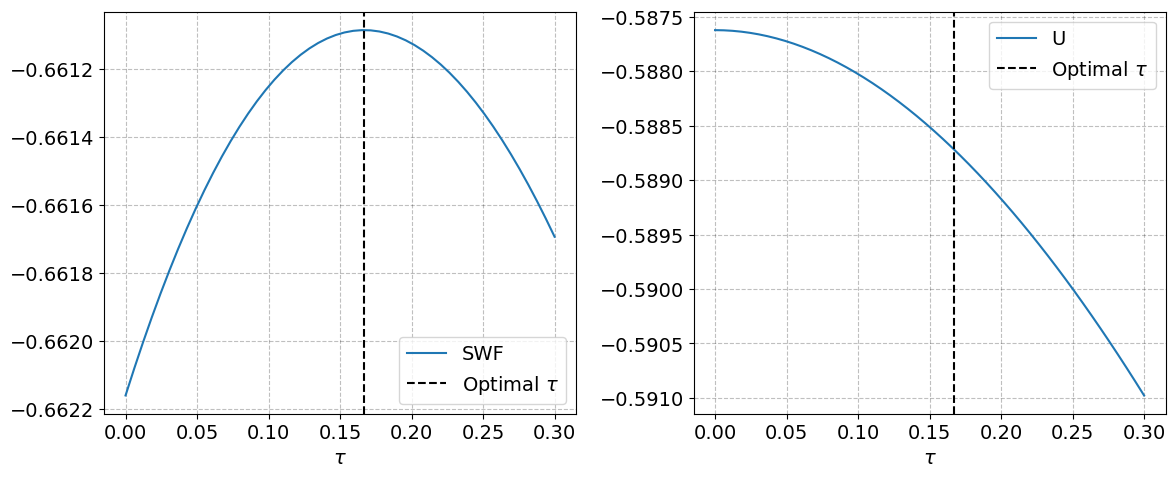

In [6]:
model.optimal_gov()

## 7. <a id='toc7_'></a>[Any final questions?](#toc0_)

**Socrative room:** PROGECON